<a href="https://colab.research.google.com/github/ev1025/Instacart/blob/main/Instacart%20%EC%9E%A5%EB%B0%94%EA%B5%AC%EB%8B%88%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인스타카트 데이터 분석

참고자료 : 케글 인스타카트 장바구니 분석 데이터     
https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis

# 1. CRISP-DM 기반 분석

## 1) 비즈니스이해

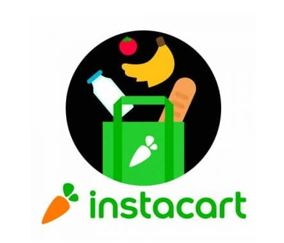

**Instacart**
- 2012년 미국 기업 Amazon의 직원이었던 ‘아푸바 메타’가 창업한 세계 최대규모의 식료품 배달 플랫폼이다.

- 홈페이지나 앱을 통해서 주문을 하면 쇼퍼가 장을 봐준 뒤 1~2시간 안에 집 앞으로 배달해주는 시스템이다.

- 2021년 12월 기준 52%의 시장점유율을 보이며 시장의 1위 자리를 굳건히 하고 있다.


**비즈니스 문제**
- 경쟁이 과열되고 혜택에 따라 플랫폼을 쉽게 옮길 수 있는 세상이다.

- 이러한 상황속에서 기존 고객을 유지하고 나아가 주요 고객으로 전환시키기 위한 방법을 분석해야한다.


**의견 제시**
- 주요고객의 특징을 파악하여 일반고객을 주요고객으로 전환한다면 고객생애가치를 높이고 비용을 절약할 수 있다.
- 신규고객 유치비용은 기존고객 유지비용의 5~6배가 든다는 연구결과가 있다. 신규고객도 유지 될 때 비로소 의미가 있다.
- 신규고객을 유치하고 끝낼 것이 아니라 위에서 언급한 주요고객으로 전환하기 위한 전략으로 이어져야한다.

**가설**
- 생각지 못한 구매 패턴이 있을 것이다.
- 주요고객만의 구매 패턴이 있다.

## 2) 데이터 이해

- **aisles.csv** : 소분류 번호, 소분류
- **departments.csv** : 대분류번호, 대분류
- **products.csv** : 제품번호,제품명, 소분류번호, 대분류번호
- **orders.csv** : 주문번호, 유저아이디, 주문횟수, 주문요일,주문시간(24시간), 주문텀(일자)
- **order_products__train.csv** : 주문번호, 제품번호, 주문순서, 재주문여부

## 3) 데이터 전처리

### 전처리

In [ ]:
%pip install mlxtend --upgrade;

In [ ]:
# 한글 그래프 폰트(런타임재시작)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf;

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from functools import reduce

In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/코드스테이츠/인스타카트/aisles.csv')               # 소분류
df2 = pd.read_csv('/content/drive/MyDrive/코드스테이츠/인스타카트/departments.csv')          # 대분류
df3 = pd.read_csv('/content/drive/MyDrive/코드스테이츠/인스타카트/order_products__train.csv')
df4 = pd.read_csv('/content/drive/MyDrive/코드스테이츠/인스타카트/orders.csv')
df5 = pd.read_csv('/content/drive/MyDrive/코드스테이츠/인스타카트/products.csv')

In [5]:
df1.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [6]:
df2.isnull().sum()

department_id    0
department       0
dtype: int64

In [7]:
df3.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [8]:
df4.isnull().sum() # 현재 주문 이전 주문과의 텀(데이터 유지)

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [9]:
df5.isnull().sum() 

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [10]:
# 데이터 합치는 함수
def df_merge(t1,t2,t3,t4,t5):
    data = pd.merge(t1,t2)
    data = pd.merge(data,t3)
    data = pd.merge(data,t4)
    data = pd.merge(data,t5)
    return data

In [11]:
full_data = df_merge(df3,df4,df5,df1,df2)
full_data.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,816049,49302,7,1,47901,train,14,4,6,16.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
2,1242203,49302,1,1,2993,train,15,0,7,7.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
3,1383349,49302,11,1,41425,train,4,3,8,14.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
4,1787378,49302,8,0,187205,train,5,4,14,30.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs


In [102]:
# 그래프분석에 사용할 데이터 만들기
df_graph = full_data[['order_id', 'user_id','product_name','aisle','department','order_number','reordered','order_dow','days_since_prior_order','order_hour_of_day']]

In [103]:
# 컬럼명 변경
def df_rename(data):
    data.columns = ['주문번호','유저','제품','소분류','대분류','누적주문','재주문','요일','주문텀','주문시간']
    return data

In [104]:
df_graph = df_rename(df_graph)
df_graph = df_graph.sort_values(by='주문번호',ignore_index=True)
df_graph.head()

,주문번호,유저,제품,소분류,대분류,누적주문,재주문,요일,주문텀,주문시간
0,1,112108,Bulgarian Yogurt,yogurt,dairy eggs,4,1,4,9.0,10
1,1,112108,Lightly Smoked Sardines in Olive Oil,canned meat seafood,canned goods,4,1,4,9.0,10
2,1,112108,Organic Celery Hearts,fresh vegetables,produce,4,0,4,9.0,10
3,1,112108,Organic Whole String Cheese,packaged cheese,dairy eggs,4,1,4,9.0,10
4,1,112108,Organic Hass Avocado,fresh fruits,produce,4,0,4,9.0,10


In [16]:
# CSV로 저장
# df_graph.to_csv('file.csv',index=False)

**시각화 옵션**

In [17]:
plt.rc('font', size= 15, family='NanumBarunGothic')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', titlesize=30)
plt.rc('axes', labelsize=20)
y_name = [0,1,2,3,4,5,6]
labels = ['일요일','월요일','화요일','수요일','목요일','금요일','토요일']

## 4) 분석 및 모델링

### 분석

#### 이용시간 분석

**요일별 주문량**

In [100]:
df_days = df_graph.groupby('요일',as_index=False)[['유저']].count()
df_days

,요일,유저
0,0,324026
1,1,205978
2,2,160562
3,3,154381
4,4,155481
5,5,176910
6,6,207279


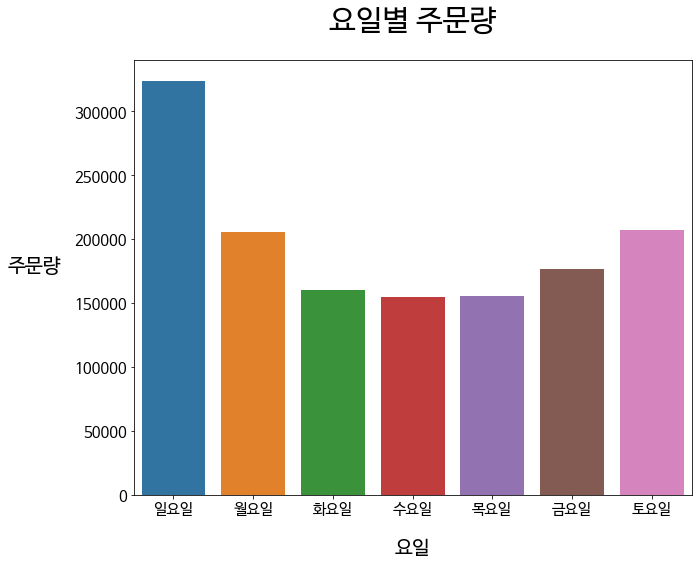

In [19]:
# 일요일에 가장 많이 이용
plt.figure(figsize=(10,8))
sns.barplot(data = df_days, x=df_days['요일'],y= df_days['유저'])
plt.title('요일별 주문량', pad=30,fontsize=30)
plt.xticks(range(7),labels,fontsize=15)
plt.yticks( fontsize=15)
plt.ylabel('주문량', rotation='horizontal',labelpad=40, fontsize=20)
plt.xlabel('요일', fontsize=20,labelpad=20)
plt.show();

**주문요일별 이용시간**

In [20]:
df_time = df_graph.groupby('요일')['주문시간'].value_counts()
heat_time = df_time.unstack()/1000

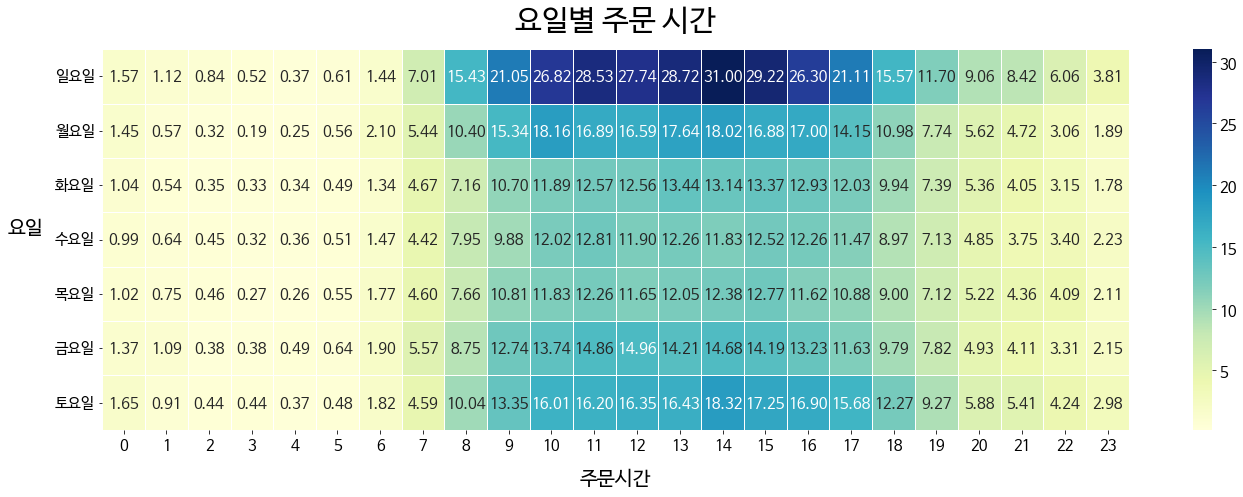

In [21]:
plt.figure(figsize=(23,7))

sns.heatmap(heat_time, annot=True, linewidths=0.5, fmt = '.2f', cmap='YlGnBu')
plt.yticks(np.arange(0.5,7.5,1), labels, rotation='horizontal')
plt.ylabel('요일',rotation='horizontal', labelpad=30, fontsize=20)
plt.xlabel('주문시간', labelpad=15, fontsize=20)
plt.title('요일별 주문 시간',pad=20,fontsize=30)

plt.show();

#### 대분류 분석

In [22]:
# 대분류 순위
df_graph['대분류'].value_counts(normalize=True)

produce            0.295451
dairy eggs         0.156759
snacks             0.085845
beverages          0.082366
frozen             0.072530
pantry             0.058675
bakery             0.034951
canned goods       0.033799
deli               0.031988
dry goods pasta    0.027959
household          0.025990
meat seafood       0.021888
breakfast          0.021306
personal care      0.015578
babies             0.010791
international      0.008596
missing            0.005959
alcohol            0.004043
pets               0.003248
other              0.001296
bulk               0.000981
Name: 대분류, dtype: float64

In [23]:
# 대분류 그래프 데이터
count_depart = df_graph['대분류'].value_counts()
count_depart = count_depart.to_frame()
count_depart.reset_index(inplace=True)
count_depart.columns = ['대분류','개수']

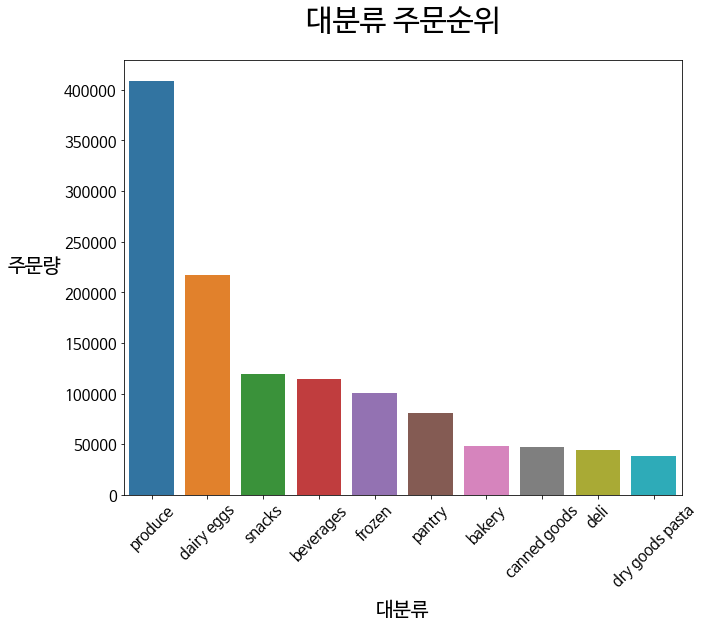

In [24]:
# 대분류 그래프
plt.figure(figsize =(10,8))
sns.barplot(data=count_depart[:10],x='대분류',y='개수')
plt.title('대분류 주문순위', pad=30,fontsize=30)
plt.xticks( fontsize=15, rotation=45)
plt.yticks( fontsize=15)
plt.ylabel('주문량', fontsize=20,labelpad=30, rotation='horizontal')
plt.xlabel('대분류', fontsize=20,labelpad=10)
plt.show();

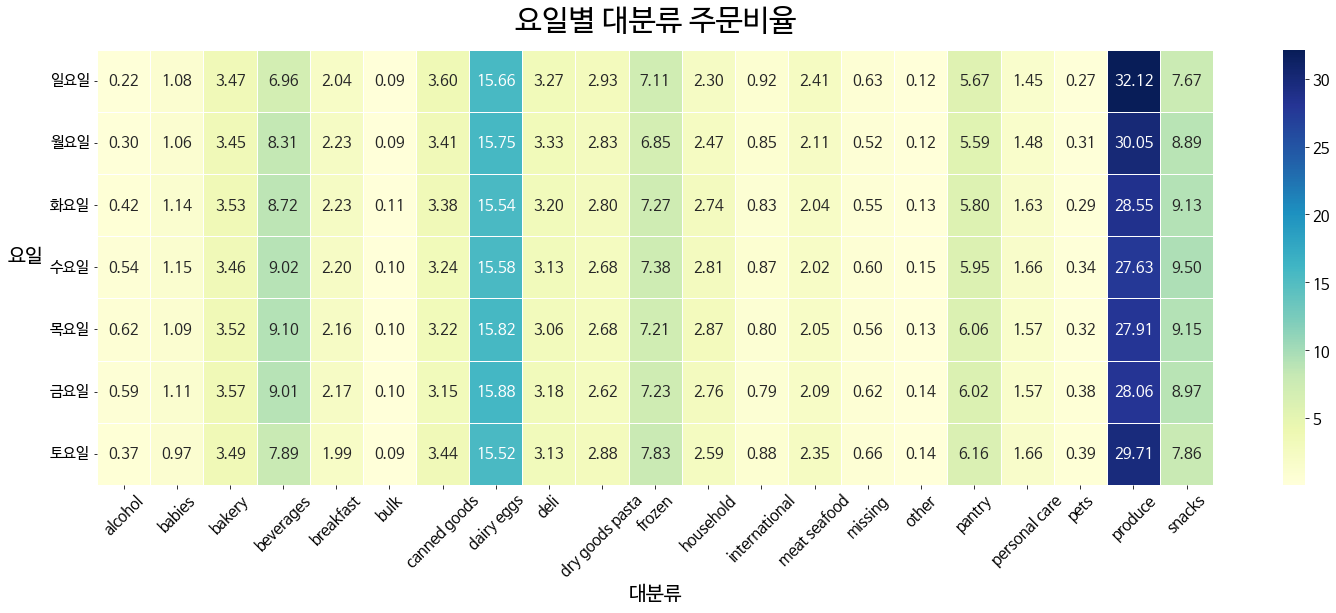

In [25]:
# 요일별 대분류 주문비율
df_day_depart = df_graph.groupby('요일')['대분류'].value_counts(normalize=True, ascending=False)
df_day_depart = df_day_depart.unstack()*100

plt.figure(figsize=(25,8))
sns.heatmap(df_day_depart, annot=True,fmt='.2f',cmap = 'YlGnBu', linewidths=0.5)
plt.yticks(np.arange(0.5,7.5,1), labels, rotation='horizontal', fontsize=15)
plt.xticks(rotation =45,fontsize=15)
plt.ylabel('요일', rotation='horizontal', labelpad=25,fontsize=20)
plt.xlabel('대분류', fontsize=20)

plt.title('요일별 대분류 주문비율',pad = 20, fontsize=30)
plt.show()

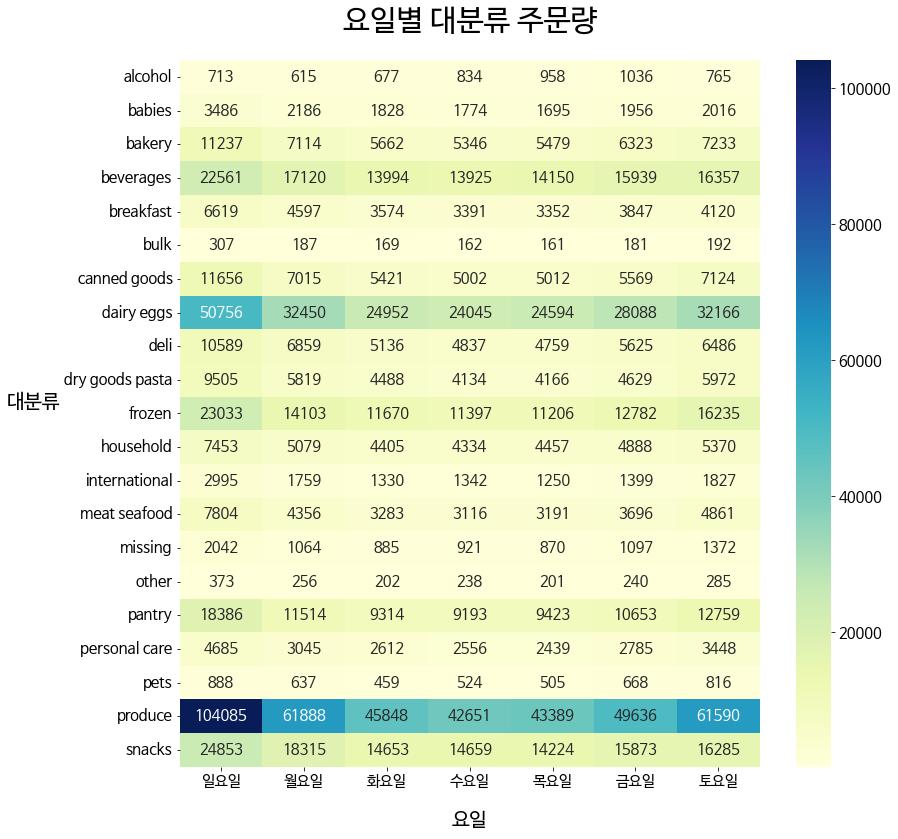

In [26]:
# 대분류별 제품 주문요일 순위
# 수,목,금요일에 알콜을 많이 주문
department_yoil = df_graph.groupby(['대분류','요일'])[['주문번호']].count().unstack().droplevel(None, axis=1)

plt.figure(figsize=(13,13))
plt.title('요일별 대분류 주문량', pad=30,fontsize=30)
sns.heatmap(department_yoil, annot=True, fmt='.0f',cmap = 'YlGnBu')
plt.xticks(np.arange(0.5,7.5,1), ['일요일','월요일','화요일','수요일','목요일','금요일','토요일'], fontsize=15)
plt.yticks( fontsize=15)
plt.ylabel('대분류', fontsize=20,labelpad=30, rotation='horizontal')
plt.xlabel('요일', fontsize=20,labelpad=20)
plt.show();

**요일별 알콜 주문량**

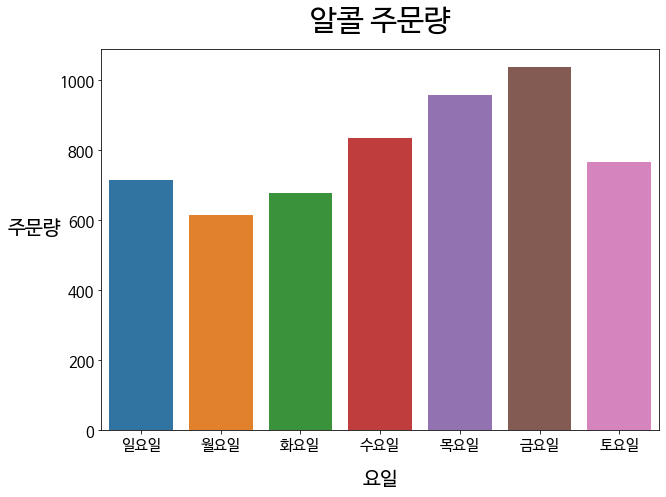

In [27]:
# 알콜주문량 시각화
al_data = df_graph[df_graph['대분류']=='alcohol'].groupby('요일')['유저'].count().to_frame().reset_index()

plt.figure(figsize=(10,7))
sns.barplot(data =al_data, x='요일', y='유저' )
plt.ylabel('주문량', rotation='horizontal', labelpad = 25,fontsize=20)
plt.xlabel('요일', fontsize=20,labelpad=15)
plt.yticks(fontsize=15)
plt.xticks(range(7),labels,fontsize=15)
plt.title('알콜 주문량',pad=20,fontsize=30)
plt.show()

#### 소분류별 분석

In [28]:
# 소분류의 비율
# 채소와 과일류의 종류가 많음
df_graph['소분류'].value_counts(normalize=True)

fresh vegetables              0.108773
fresh fruits                  0.108675
packaged vegetables fruits    0.056689
yogurt                        0.039896
packaged cheese               0.030116
                                ...   
kitchen supplies              0.000324
baby bath body care           0.000237
baby accessories              0.000221
frozen juice                  0.000212
beauty                        0.000207
Name: 소분류, Length: 134, dtype: float64

In [29]:
# 새로운 패턴을 찾기 위해
# 주문량이 제일 높은 날이 일요일이 아닌 소분류만 출력
aisle_no_0 = []
for i in set(df_graph['소분류']):
    if df_graph[df_graph['소분류']==i]['요일'].value_counts().index[0] != [0]:
        aisle_no_0.append(i)

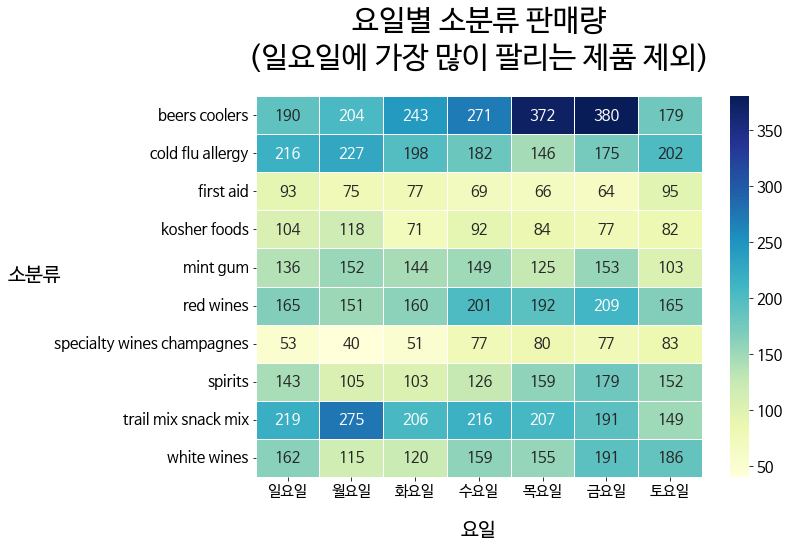

In [30]:
# 수,목, 금요일에 알콜관련 소분류가 많이 팔림
aisle_yoil = df_graph.groupby(['소분류','요일'])[['주문번호']].count().unstack().droplevel(None,axis=1)
aisle_heat = aisle_yoil.query('index in @aisle_no_0')

plt.figure(figsize=(10,7))
plt.title('요일별 소분류 판매량\n(일요일에 가장 많이 팔리는 제품 제외)', pad=30,fontsize=30)
sns.heatmap(aisle_heat, annot=True, fmt='.0f',cmap = 'YlGnBu', linewidths=0.5)
plt.xticks(np.arange(0.5,7.5,1), ['일요일','월요일','화요일','수요일','목요일','금요일','토요일'], fontsize=15)
plt.yticks( fontsize=15,rotation='horizontal')
plt.ylabel('소분류', fontsize=20,labelpad=20, rotation='horizontal')
plt.xlabel('요일', fontsize=20,labelpad=20)
plt.show();

#### 제품별 분석

**가장 많이 팔리는 제품**

In [31]:
# 가장 잘팔리는 top10
product_count = df_graph['제품'].value_counts()
top_10 = product_count[:10].to_frame().reset_index()
top_10.rename(columns={'index':'제품명'},inplace=True)
top_10

,제품명,제품
0,Banana,18726
1,Bag of Organic Bananas,15480
2,Organic Strawberries,10894
3,Organic Baby Spinach,9784
4,Large Lemon,8135
5,Organic Avocado,7409
6,Organic Hass Avocado,7293
7,Strawberries,6494
8,Limes,6033
9,Organic Raspberries,5546


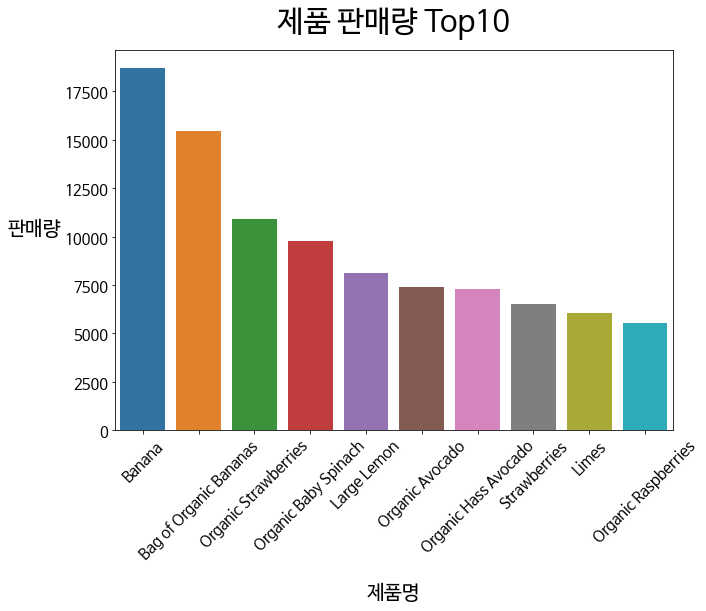

In [32]:
plt.figure(figsize=(10,7))
sns.barplot(data = top_10, x='제품명',y='제품')
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('제품명', fontsize=20,labelpad=20)
plt.ylabel('판매량', rotation='horizontal',labelpad=30,fontsize=20)
plt.title('제품 판매량 Top10', pad = 20,fontsize=30)
plt.show()

**판매량이 높은 제품이 재주문률도 높을까?**

In [33]:
# 판매량,재주문률 데이터
df_reorder_ = df_graph.groupby(['제품'],as_index=False)['주문번호'].count()
reorder_count = df_graph.groupby(['제품'])['재주문'].sum()
df_reorder_ = pd.merge(df_reorder_, reorder_count, on='제품')
df_reorder_['재주문률'] = round(df_reorder_['재주문'] / df_reorder_['주문번호'],2)*100
df_reorder_.rename(columns={'주문번호':'주문횟수'}, inplace=True)
df_reorder_.sort_values(by='주문횟수', ascending=False,inplace=True)

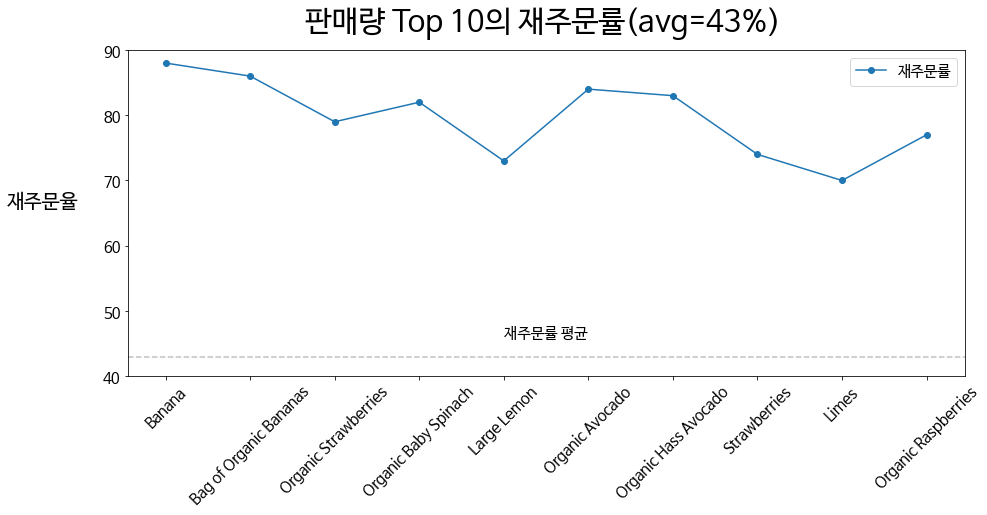

In [34]:
# 전체 재주문률이 43%인데, top10제품의 재주문률은 최소가 70%
plt.figure(figsize=(15,6))
plt.plot(df_reorder_['제품'][:10], df_reorder_['재주문률'][:10],marker='o', label='재주문률')
plt.xticks(rotation=45)
plt.yticks(np.arange(40,100,10))
plt.ylabel('재주문율',rotation='horizontal',labelpad=60)
plt.title(f"판매량 Top 10의 재주문률(avg={round(np.mean(df_reorder_['재주문률']))}%) ",pad = 20)
plt.axhline(43, linestyle='--',color='gray',alpha=0.5)
plt.annotate('재주문률 평균',(4,46))
plt.legend(loc=1,fontsize=15)
plt.show()

#### 누적주문이 높은 사람의 주문량

In [35]:
df_pivot = df_graph.groupby(['유저','누적주문'],as_index=False)[['주문번호']].count()
df_pivot.rename(columns={'주문번호':'주문량'},inplace =True)
df_pivot

,유저,누적주문,주문량
0,1,11,11
1,2,15,31
2,5,5,9
3,7,21,9
4,8,4,18
...,...,...,...
131204,206199,20,22
131205,206200,24,19
131206,206203,6,13
131207,206205,4,19


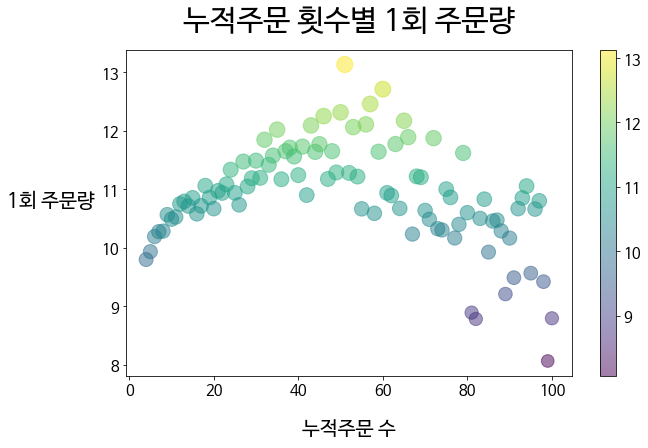

In [36]:
# 누적주문 수가 높은 고객층에서 1회 주문량이 적은 경우가 많다.
# 신선식품이기때문에 필요한 재료만 신선하게 사는듯하다.
df_pivot_scatter = df_pivot.groupby('누적주문',as_index=False)['주문량'].mean()
max_length = df_pivot_scatter.주문량.max()

plt.figure(figsize=(10,6))
plt.scatter(df_pivot_scatter.누적주문,
            df_pivot_scatter.주문량,
            alpha=0.5,
            s=df_pivot_scatter.주문량*20,
            c = df_pivot_scatter.주문량,
            cmap='viridis')

plt.ylabel('1회 주문량', rotation='horizontal', labelpad=50,fontsize=20)
plt.xlabel('누적주문 수',labelpad=20, fontsize=20)
plt.title('누적주문 횟수별 1회 주문량',pad=20)
plt.colorbar()
# plt.clim(0, max_length)
plt.show();

### 연관규칙분석(Association Rule)

In [37]:
# 주문번호 별 주문 리스트 나누기(한 번 주문 할 때 어떤 물건을 같이 사는지 확인하기 위해서)

# 연관규칙분석을 위해 요소 비교를 하는 과정에서 시간이 오래걸려서 리스트 대신 array를 사용하였다.
# 하나의 iterator 요소간 비교에서 zip 함수를 사용 할 수 있었다.
# 마지막 열은 record에 append 되지 않는 점을 확인하여 if문을 하나 더 추가하여 마지막 열 추가

df_array = df_graph.values # 전체 데이터를 array화 하여 계산속도 증가

record = [] # 주문번호 별 주문내역리스트
record2 =[] # 한 주문에 포함 된 내역

for p1, p2 in zip(df_array, df_array[1:]): # 0과1 1과2 ... 비교하도록 for문 

    if p1[0]==p2[0]:              # 주문번호가 같으면 record2에 추가
        record2.append(p1[2])

        if p1[2]==df_array[-2][2]: # 전체데이터의 마지막열에 도달하면 마지막 주문내역 record에 추가
            record2.append(p2[2])
            record.append(record2)
  
    else:
        record2.append(p1[2])    # 주문번호가 다르면 해당 주문의 마지막 물건이다. 주문번호 마지막 목록을 record2에 추가하고
        record.append(record2)   # 해당 주문을 그룹화한 record2를 record에 추가하고
        record2 = []             # record2를 초기화

In [38]:
# 같은 주문번호끼리 list
record[0]

['Bulgarian Yogurt',
 'Lightly Smoked Sardines in Olive Oil',
 'Organic Celery Hearts',
 'Organic Whole String Cheese',
 'Organic Hass Avocado',
 'Bag of Organic Bananas',
 'Organic 4% Milk Fat Whole Milk Cottage Cheese',
 'Cucumber Kirby']

In [39]:
# 위에 record 확인용
df_graph.head(10)

,주문번호,유저,제품,소분류,대분류,누적주문,재주문,요일,주문텀,주문시간
0,1,112108,Bulgarian Yogurt,yogurt,dairy eggs,4,1,4,9.0,10
1,1,112108,Lightly Smoked Sardines in Olive Oil,canned meat seafood,canned goods,4,1,4,9.0,10
2,1,112108,Organic Celery Hearts,fresh vegetables,produce,4,0,4,9.0,10
3,1,112108,Organic Whole String Cheese,packaged cheese,dairy eggs,4,1,4,9.0,10
4,1,112108,Organic Hass Avocado,fresh fruits,produce,4,0,4,9.0,10
5,1,112108,Bag of Organic Bananas,fresh fruits,produce,4,0,4,9.0,10
6,1,112108,Organic 4% Milk Fat Whole Milk Cottage Cheese,other creams cheeses,dairy eggs,4,1,4,9.0,10
7,1,112108,Cucumber Kirby,fresh vegetables,produce,4,0,4,9.0,10
8,36,79431,Asparagus,fresh vegetables,produce,23,1,6,30.0,18
9,36,79431,Grated Pecorino Romano Cheese,specialty cheeses,dairy eggs,23,0,6,30.0,18


**surpport (지지도)**
- $P(A∩B)$ 
- A,B가 동시에 일어난 수 / 전체 거래 수
- A와 B가 동시에 거래되는 비중 

**confidence (신뢰도)**
- $P(A∩B)/P(A)$
- A,B가 동시에 일어난 수 / A가 일어난 수
- A를 포함하는 거래 중 A,B가 동시에 거래되는 비중

**lift(향상도)**
- $P(A∩B) / P(A)*P(B)$  = $P(B|A) / P(B)$
- A,B가 동시에 일어난 수 / 독립된 A * 독립된 B
- AB, AC가 같은 신뢰도를 가질 때, B와 C 중 어느것이 더 관련있는지
- (lift = 1) 독립 / (lift > 1) 양의 상관관계 / (lift < 1) 음의 상관관계  

> **Tip**   
1. 지지도,신뢰도, 향상도가 모두 높다 = 좋은 rule
2. 지지도가 낮고 신뢰와 향상도가 높다 = 실효성이 떨어짐


#### **apriori공식문서** : http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

In [40]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(record).transform(record) # fit = 고유한 라벨을 갖게됨 / transform = 원핫인코딩,numpy배열로 전환
ap_data = pd.DataFrame(te_ary,columns=te.columns_) # 원핫 인코딩 된 데이터프레임으로 변환

In [41]:
# 주문당 평균 10건 주문 -> 주문건당 혜택?
mean_order =[te_ary[i].sum() for i in range(len(te_ary))]
np.mean(mean_order) 

10.622537348184979

In [42]:
# 지지도가 0.1% 이상인 데이터 출력
# 데이터용량이 커서 메모리부족현상발생 ->FP-growth 알고리즘 사용
from mlxtend.frequent_patterns import apriori, association_rules

# frequent_itemsets = apriori(ap_data, min_support=0.1, use_colnames=True)
# frequent_itemsets

In [43]:
# association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)

#### FP-growth Algorithm

In [44]:
# import에러 발생하여 mlxtend 버전업그레이드 진행
from mlxtend.frequent_patterns import fpgrowth

result = fpgrowth(ap_data, min_support=0.01, use_colnames=True).sort_values(by='support',ascending=False)
result_chart = association_rules(result, metric='confidence',  min_threshold=0.01)

In [45]:
result.sort_values(by='support',ascending=False).head(10)

,support,itemsets
25,0.142858,(Banana)
0,0.120506,(Bag of Organic Bananas)
22,0.084055,(Organic Strawberries)
40,0.076634,(Organic Baby Spinach)
32,0.062341,(Large Lemon)
63,0.057143,(Organic Avocado)
1,0.057023,(Organic Hass Avocado)
29,0.049460,(Strawberries)
41,0.046328,(Limes)
10,0.042865,(Organic Raspberries)


In [46]:
result_chart.sort_values(by=['antecedent support','confidence','lift'],ascending=False)
 
# dfStyler = result_chart.sort_values(by=['antecedent support','confidence','lift'],ascending=False).style.set_properties(**{'text-align': 'center'})
# dfStyler.set_table_styles([dict(selector='th',props=[('text-align', 'left')])])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(Banana),(Organic Avocado),0.142858,0.057143,0.017132,0.119926,2.098696,0.008969,1.071338
9,(Banana),(Organic Strawberries),0.142858,0.084055,0.016704,0.116930,1.391107,0.004696,1.037228
11,(Banana),(Large Lemon),0.142858,0.062341,0.016584,0.116088,1.862155,0.007678,1.060806
12,(Banana),(Organic Baby Spinach),0.142858,0.076634,0.015540,0.108780,1.419474,0.004592,1.036070
15,(Banana),(Strawberries),0.142858,0.049460,0.014887,0.104206,2.106894,0.007821,1.061115
31,(Banana),(Limes),0.142858,0.046328,0.010260,0.071819,1.550248,0.003642,1.027464
1,(Bag of Organic Bananas),(Organic Strawberries),0.120506,0.084055,0.023907,0.198392,2.360263,0.013778,1.142634
3,(Bag of Organic Bananas),(Organic Hass Avocado),0.120506,0.057023,0.019348,0.160558,2.815674,0.012477,1.123338
4,(Bag of Organic Bananas),(Organic Baby Spinach),0.120506,0.076634,0.017869,0.148280,1.934903,0.008634,1.084119
17,(Bag of Organic Bananas),(Organic Raspberries),0.120506,0.042865,0.013940,0.115682,2.698751,0.008775,1.082342


#### 누적주문이 많은 유저의 연관규칙분석

In [47]:
# 누적주문이 많은 유저
top_user = df_graph.groupby('유저')[['누적주문']].max().sort_values(by='누적주문',ascending=False)

In [48]:
# 누적구매 top 200 유저들이 구매하는 제품의 빈발집단 생성
top_items = []
for i in list(top_user[:500].index):
    top_items.append(list(df_graph[df_graph['유저']==i]['제품'].values))

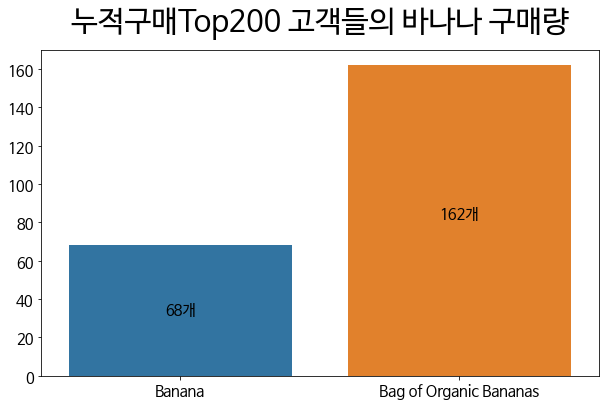

In [49]:
# 누적주문이 많은 고객은 일반 바나나보다 친환경 바나나를 선호한다.

count_1 = 0
count_2 = 0

for i in range(len(top_items)):
    for j in range(len(top_items[i])):
        if top_items[i][j] in 'Banana':
            count_1 += 1

for i in range(len(top_items)):
    for j in range(len(top_items[i])):
        if top_items[i][j] in 'Bag of Organic Bananas':
            count_2 += 1

df_banana = pd.DataFrame([[68,162]], columns=['Banana', 'Bag of Organic Bananas'])
plt.figure(figsize=(10,6))
plt.annotate('68개',(0,30),va='bottom',ha='center')
plt.annotate('162개',(1,80),va='bottom',ha='center')
plt.title('누적구매Top200 고객들의 바나나 구매량',pad=20)
sns.barplot(data=df_banana)
plt.show()

In [50]:
te2 = TransactionEncoder()
te_ary2 = te2.fit(top_items).transform(top_items) # fit = 고유한 라벨을 갖게됨 / transform = 원핫인코딩,numpy배열로 전환
ap_data2 = pd.DataFrame(te_ary2,columns=te2.columns_) # 원핫 인코딩 된 데이터프레임으로 변환

In [51]:
result2 = fpgrowth(ap_data2, min_support=0.01, use_colnames=True).sort_values(by='support',ascending=False)
result_chart2 = association_rules(result2, metric='confidence',  min_threshold=0.5)
# result_chart2.sort_values(by=['antecedent support','confidence','lift'],ascending=False)

In [52]:
# 빈발집단 연관성분석
association = result_chart2[['antecedents','consequents','antecedent support','confidence','lift']].sort_values(by=['antecedent support','confidence','lift'],ascending=False)
association.head(10)

,antecedents,consequents,antecedent support,confidence,lift
0,(Organic Lemon),(Bag of Organic Bananas),0.052,0.500000,2.873563
4,"(Organic Strawberries, Bag of Organic Bananas)",(Organic Hass Avocado),0.032,0.500000,5.813953
1,(Organic Cucumber),(Bag of Organic Bananas),0.030,0.533333,3.065134
2,(Honeycrisp Apple),(Banana),0.026,0.615385,4.524887
3,"(Organic Strawberries, Organic Hass Avocado)",(Bag of Organic Bananas),0.026,0.615385,3.536693
10,"(Bag of Organic Bananas, Organic Lemon)",(Organic Hass Avocado),0.026,0.538462,6.261181
8,(Organic Small Bunch Celery),(Organic Yellow Onion),0.024,0.583333,11.666667
7,(Organic Small Bunch Celery),(Organic Hass Avocado),0.024,0.583333,6.782946
12,"(Organic Large Extra Fancy Fuji Apple, Bag of ...",(Organic Hass Avocado),0.024,0.583333,6.782946
5,(Organic Fuji Apple),(Banana),0.024,0.583333,4.289216


In [53]:
# 연관규칙분석 아보카도 개수
avocado_count = 0
for i in range(len(result_chart2)):
    for j in result_chart2.sort_values(by=['antecedent support','confidence','lift'],ascending=False)['antecedents'][i]:
        if j == 'Organic Hass Avocado':
            avocado_count +=1

for i in range(len(result_chart2)):
    for j in result_chart2.sort_values(by=['antecedent support','confidence','lift'],ascending=False)['consequents'][i]:
        if j == 'Organic Hass Avocado':
            avocado_count +=1
avocado_count

20

In [54]:
# 연관규칙분석 바나나 개수
banana_count = 0
for i in range(len(result_chart2)):
    for j in result_chart2.sort_values(by=['antecedent support','confidence','lift'],ascending=False)['antecedents'][i]:
        if j == 'Banana':
            banana_count +=1

for i in range(len(result_chart2)):
    for j in result_chart2.sort_values(by=['antecedent support','confidence','lift'],ascending=False)['consequents'][i]:
        if j == 'Banana':
            banana_count +=1
banana_count

2

In [55]:
# 연관규칙분석 오가닉바나나 개수
organic_ba_count = 0
for i in range(len(result_chart2)):
    for j in result_chart2.sort_values(by=['antecedent support','confidence','lift'],ascending=False)['antecedents'][i]:
        if j == 'Bag of Organic Bananas':
            organic_ba_count +=1

for i in range(len(result_chart2)):
    for j in result_chart2.sort_values(by=['antecedent support','confidence','lift'],ascending=False)['consequents'][i]:
        if j == 'Bag of Organic Bananas':
            organic_ba_count +=1
organic_ba_count

22

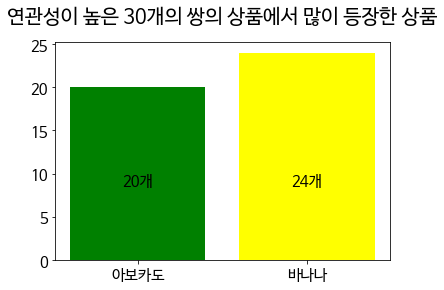

In [56]:
# 연관성분석 30개중 아보카도와 바나나를 포함한 수
# 바나나와 아보카도가 핵심아이템!
assosi_df = pd.DataFrame({'개수': (avocado_count, banana_count+organic_ba_count)}, index=['아보카도','바나나'])
plt.bar(range(2),assosi_df.개수, color=['green','yellow'])
plt.title('연관성이 높은 30개의 쌍의 상품에서 많이 등장한 상품', pad=20, fontsize=20)
plt.xticks(range(2), assosi_df.index)
plt.annotate('20개',(0,10),va='top',ha='center')
plt.annotate('24개',(1,10),va='top',ha='center')
plt.show();

### K-Means분석

**PCA기반 K-Means분석**

In [57]:
# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_pca = np.array(df_graph[['누적주문','재주문','요일','주문텀','주문시간']])

scaler = StandardScaler()
standard_data = scaler.fit_transform(df_pca)

pca = PCA()
pca_result = pca.fit_transform(standard_data)

# 70%에 맞춰서 3개선택
pca.explained_variance_ratio_

array([0.30876731, 0.20189301, 0.19840999, 0.17306508, 0.11786461])

In [58]:
# PCA(3) 결과 =pca.one
pca = PCA(3)
pca_one = pca.fit_transform(standard_data)
pca.explained_variance_ratio_

array([0.30876731, 0.20189301, 0.19840999])

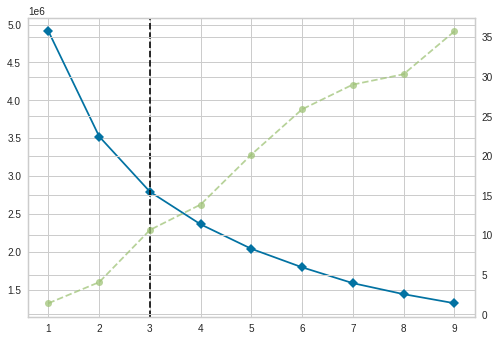

In [59]:
# Elbow Method(적절한 K의 개수 구하기)
# 파란색 : 각 데이터간 군집의 중심과의 평균거리
# 초록색 : 학습시간
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

elbow = KMeans()
elbow_vi = KElbowVisualizer(elbow, k=(1,10))
elbow_vi.fit(pca_one)
plt.xlabel('Number of "K"', labelpad=10)
plt.show();

In [60]:
# KMEANS 결과 기록
k=3
model = KMeans(n_clusters=k, random_state=12)
model.fit(pca_one)

df_graph['cluster_pca'] = model.fit_predict(pca_one)

In [61]:
# 시각화할 피처엔지니어링

# 기존데이터, pca진행한 데이터를 합쳐준다.
k_scatter = pd.concat([pd.DataFrame(df_pca), pd.DataFrame(pca_one)],axis=1) 
k_scatter.columns = ['누적주문','재주문','요일','주문텀','주문시간','component1','component2','component3']
 
# k-means모델 군집 피쳐 생성
k_scatter['pca_cluster'] = model.labels_

# 범주에 사용할 feature생성
k_scatter['segment'] = k_scatter['pca_cluster'].map({0:'first',
                                                      1:'second',
                                                      2:'third'})

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


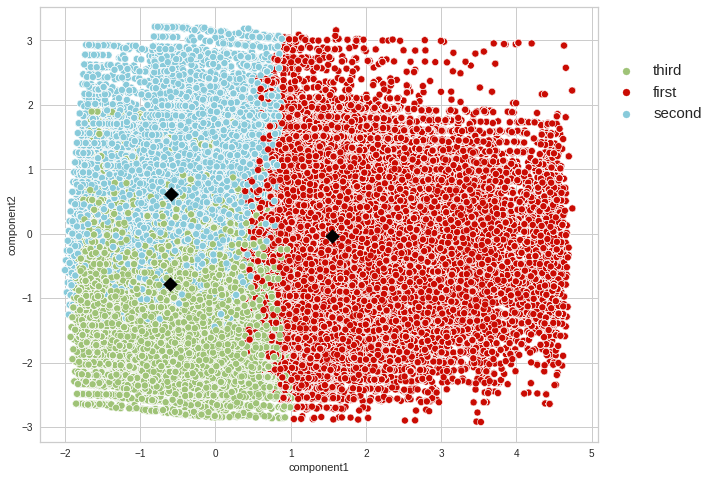

In [62]:
# pca + kmeans 시각화

plt.figure(figsize=(10,8))

# 군집
x_axis = k_scatter['component1']
y_axis = k_scatter['component2']
sns.scatterplot(x_axis, y_axis, hue=k_scatter['segment'],palette=['g','r','c'])

# 군집의 중심점
centers = pd.DataFrame(model.cluster_centers_,columns=['first','second','third'])
center_x = centers['first']
center_y = centers['second']
plt.scatter(center_x, center_y, s=100, marker='D',c='Black')
plt.legend(bbox_to_anchor=(1, 0.9), fontsize=15)
plt.show();

In [95]:
# 주요고객(first)
# 평균 34회 이상 주문 고객이 많고, 주문텀은 일주일 주기로 주문한다.
k_scatter[k_scatter['segment']=='first'].iloc[:,:4].mean()

누적주문    34.265334
재주문      0.916957
요일       2.896040
주문텀      7.163234
dtype: float64

In [96]:
# 주요고객(first)
k_scatter[k_scatter['segment']=='first'].iloc[:,:4].mode()

,누적주문,재주문,요일,주문텀
0,22.0,1.0,0.0,7.0


In [88]:
k_scatter[k_scatter['segment']=='second'].iloc[:,:4].mean()

누적주문    10.440291
재주문      0.539353
요일       0.910406
주문텀     21.088044
dtype: float64

In [89]:
k_scatter[k_scatter['segment']=='third'].iloc[:,:4].mean()

누적주문    10.487870
재주문      0.393128
요일       4.850985
주문텀     20.631777
dtype: float64

**Feature Selection K-Means**

In [66]:
# 누적주문량과 주문텀을 이용한 군집화(실패)
from sklearn.preprocessing import MinMaxScaler
df_model = df_graph[['누적주문','주문텀']].dropna()
scaler = MinMaxScaler()
sc_data = scaler.fit_transform(df_model)

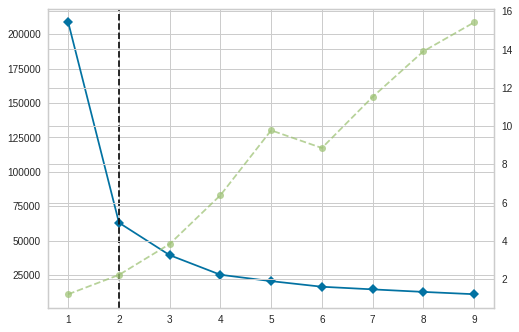

In [67]:
# Elbow Method
elbow = KMeans()
elbow_vi = KElbowVisualizer(elbow, k=(1,10))
elbow_vi.fit(sc_data)
plt.show();
# 파란색 : 각 데이터간 군집의 중심과의 평균거리
# 초록색 : 학습시간

In [68]:
k = 2
model = KMeans(n_clusters=k, random_state=12)
model.fit(sc_data)

df_graph['cluster'] = model.fit_predict(sc_data)

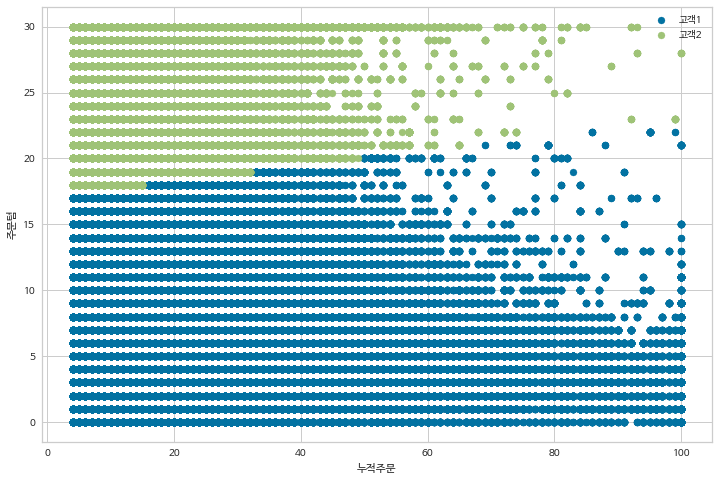

In [69]:
plt.rc('font', size= 15, family='NanumBarunGothic')
plt.figure(figsize=(12,8))
for i in range(k):
    plt.scatter(df_graph.loc[df_graph['cluster']==i, '누적주문'], 
                df_graph.loc[df_graph['cluster']==i, '주문텀'])
plt.xlabel('누적주문')
plt.ylabel('주문텀')
plt.legend(['고객1', '고객2'])
plt.show();

## 5) 평가

### 프로젝트 수행 결과

**가설 1. 생각지 못한 구매 패턴이 존재할 것이다.**
- 전체 주문량이 저조한 `수, 목, 금요일`에 주류 판매비율이 높은 특징이 있다.

- 수, 목, 금요일에 주류 및 관련 제품의 판매촉진으로 저조한 주문량을 끌어올린다.

**가설 2. 주요 고객만의 구매 패턴이 있다.**
- 누적주문이 많은 고객들은 유기농 제품을 선호하며 특히 유기농 바나나와 Hass품종의 아보카도를 많이 구매했다.

- 누적주문이 많은 고객들은 제품을 소량 구매하는 경향이 있다. 이는 제품의 품질에 신경을 많이 쓴다는 의미로 해석될 수 있다.

- 품질이 우수한 유기농 제품의 프로모션을 진행하면 누적주문이 많은 고객에게는 로열티 효과가 적용되어 만족도를 올릴 수 있다.

- 또, 일반 고객이 유기농 제품을 접할 기회를 제공하여 주요 고객으로 전환률을 높일 수 있다.

- PCA를 이용한 K-Means Clustering 결과 서비스를 평균 34회 이상 이용하며, 일주일 단위로 주문하는 'first'군집을 주요 고객으로 분류하였다. 

- 따라서 주요회원 등급은 누적 30회 이상 주문자로 설정하고, 일주일 단위로 혜택을 제공하는 방안을 제시한다.

### 자체평가

- 데이터를 핸들링 하는데 있어서 부족함을 많이 느꼈다.

- 많은 양의 데이터를 처음 다뤄보니 연산속도의 중요성이 크게 와 닿았다. 데이터프레임 연산 과정에서 램부족으로 인한 런타임 초기화 오류가 지속되어 배열을 활용하여 문제를 해결하였다.

- 추천시스템의 시초인 연관규칙분석에 대해 직접 찾아서 공부하고 적용해보는 과정이 신기하고 재미있었다.

- 연관규칙분석 과정에 빈발집단 데이터프레임을 생성해야하는데, 이 알고리즘을 만들면서 많은 시행착오를 겼었다. 

- Apriori를 이용한 연관규칙 분석을 시행하는 도중, 램 부족 현상을 다시 한 번  겪었다. 결국 트리구조에 기반한 FP-growth 알고리즘을 사용하여 데이터 스캔 횟수를 줄이고 문제를 해결하였다.
- 각 컬럼에 대한 이해와 인사이트 도출이 어려웠고 수익성 있는 결과를 내지 못한 것 같다. 조금 더 분석가적인 사고방식을 길러야 겠다.

- 더 다양한 분석 방법과 모델링을 공부해보아야겠다는 생각이 들었다.